# Optimization 2

Because one optimization notebook is never enough. 

This notebook will assume familiarity with most definitions, theorems, and topics from the first notebook.

Tentative Topics to Cover below:
- Level Method (as an alternative to sugradient descent)
- Stochastic Gradient Descent (under many regimes and step sizes - analyzing last iterate and average)
- Structural Optimization: enough of this black box stuff :) - interior point methods and accelerated cubic newton
- Accelerated Gradient Descent (and the dawn of State of the art Adam, etc.)

In [1]:
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time
from matplotlib.animation import FuncAnimation

from IPython.core.display import Image, display
from mpl_toolkits.mplot3d import Axes3D

# Set plotting font sizes and properties
TINY_SIZE = 12
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 20
MARKER_SIZE = 6
LINE_SIZE = 4

plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=BIGGER_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=TINY_SIZE)  # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc("lines", markersize=MARKER_SIZE)  # marker size
plt.rc("lines", linewidth=LINE_SIZE)  # line width

mpl.rcParams["figure.dpi"] = 180 # sets the image quality

# Height and width per row and column of subplots
FIG_HEIGHT = 18
FIG_WIDTH = 16
fig_fcn = lambda kwargs: plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT), **kwargs)
color_list = sns.color_palette("Paired")

# Level Method

## Intuition and Formation

Let's discuss the Level Method which is an algorithmic scheme more flexible than the subgradient method for solving problems of the form

$$\min\limits_{x\in G} f(x)$$


where $f(\cdot)$ is a Lipschitz continuous convex function and $G$ is a closed convex set. This method revolves around the idea of a \textit{nonsmooth model} for a convex objective function that aids us with the difficult task of identifying a lower bound for the global minimum.

**Definition 3.3.1**: Let $X=\{x_k\}_{k=0}^\infty$ be a sequence of points in $G$. Define 
    
$$\hat{f}_k(X; x)=\max\limits_{i\in[k]} \left[ f(x_i) + \langle g(x_i), x-x_i\rangle\right]$$
    
    
where $g(x_i)$ are some subgradients of $f$ at $x_i$. The function $\hat{f}_k(X;\cdot)$ is called a *nonsmooth model* of the convex function $f$.


This function consists of $k$ points in $G$ ($x_1,\dots,x_k$) where $k$ linear tangents to the curve are drawn and the tangent closest to the curve at the desired point $x$ is this model's estimate of $f(x)$. From this, we gather that 

1. $\hat{f}_k(X;\cdot)$ is piece-wise linear 
2. $\hat{f}_k(X;x)\leq f(x)$ for all $x\in\mathbb{R}^n$ as $f(\cdot)$ is convex
3. $\hat{f}_{k+1}(X;x)\geq \hat{f}_k(X;x)$


From point 2., we have now identified a point that forms a lower bound for the minimum $f(x^*)$ and we can easily form an upper bound as the function is convex so the Level Method is constructed around the following important bounds at each step and their difference:

$$\hat{f}_k^-(x)=\min\limits_{x\in G} \hat{f}_k(X;x),\;\;\;\; \hat{f}_k^+(x)=\min\limits_{i\in[k]} f(x_i),\;\;\;\; \Delta_k(x)=\hat{f}^+_k(x)-\hat{f}^-_k(x).
$$


Notice that $\hat{f}^+_k(x)$ is monotonically decreasing with respect to $k$ as the minimum can only decrease with more search points and $f(x^*)\leq \hat{f}^+(x)$ for all $x\in\mathbb{R}^n$. From this and 3. from above, we see that $\Delta_k$ is monotonically decreasing and bounded above by zero. These points bolster good intuition as for why this method will at least converge. However, developing a nice update scheme is still a bit hazy. It is obvious that we desire our next iterate to lie somewhere between this lower and upper bound, and the following level set characterizes this region.


$$\mathcal{Q}(\lambda)=\left\{x\in G:\hat{f}_k(X;x)\leq (1-\lambda)\hat{f}_k^-(x) + \lambda\hat{f}_k^+(x)\right\}$$


This set is clearly closed and convex and $\mathcal{Q}(\lambda)$ increases in cardinality as $\lambda$ increases. Our next step should then simply project the prior iterate onto this smaller region and this finally yields the Level Method below.

___
**Algorithm: Level Method**
___

**Require** $x_0\in G$, $\epsilon >0$, $\lambda\in(0,1)$

**for** $t\leftarrow 1,2,\dots$
- Compute $\hat{f}_i^-(x_i)$ and $\hat{f}_i^+(x_i)$
-  **If** $\hat{f}_i^+(x_i)-\hat{f}_i^-(x_i)\leq \epsilon$:

    Break **for**
    
    
- **Else**:

    Form the level set $\mathcal{Q}(\lambda)$

    $x_{i+1}\leftarrow \Pi_{\mathcal{Q}(\lambda)}(x_i)$

___


## Running Time Derivation

....

# Accelerated Gradient Descent



# Running Time Comparison of Algorithms

Here we look at the algorithms discussed above and again benchmark our results over the maxquad functions. We can test more functions of course to test down the line. The maxquad functions were defined in the earlier notebook, but as a refresher, we have 

$$f(x)=\max\limits_{i\in[n]}\left\{x^TA_ix - x^Tb_i\right\}$$

where 

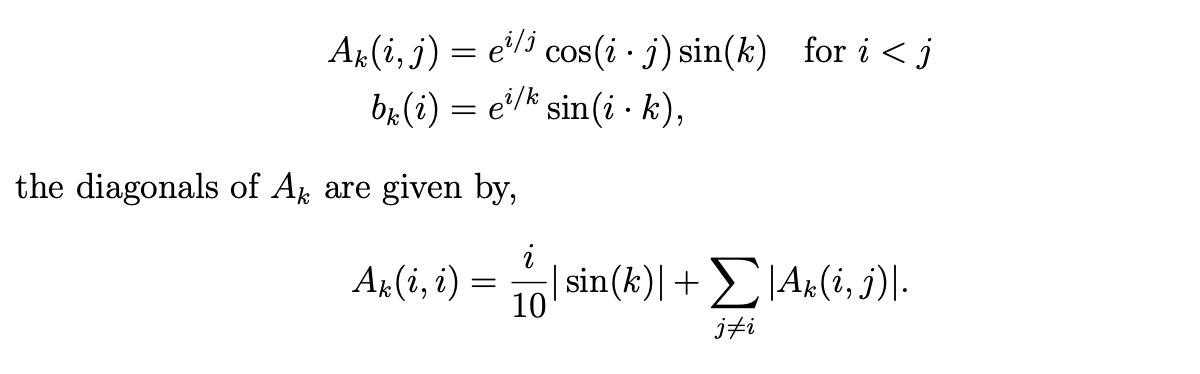

In [13]:
display(Image("figs/maxquad.png", width=600, unconfined=True))

In [14]:
# define maxquad function as above
e = np.exp(1)

# input dimension
d=10

# number of quadratic forms
n = 5

A = np.zeros((n, d, d))
b = np.zeros((n, d))

for k in range(1, n+1, 1):
    for i in range(1, d+1, 1):
        for j in range(1, d+1, 1):
            if j > i:
                A[k-1, i-1, j-1] = (e**(i/j)) * np.cos(i*j) * np.sin(k)

    for i in range(1, d+1, 1):
        for j in range(1, d+1, 1):
            if j < i:
                A[k-1, i-1, j-1] = A[k-1, j-1, i-1]
        b[k-1, i-1] = (e**(i/k)) * np.sin(i*k)

    for i in range(1, d+1, 1):
        A[k-1, i-1, i-1] = np.sum(np.abs(A[k-1, i-1, :])) + i/d * np.abs(np.sin(k))
        
# define evaluation of each n quadratic forms
def quad(k,x):
    return np.dot(np.matmul(A[k, :, :], x), x) - np.dot(b[k, :], x)

# define the maxquad function
def maxquad(x):
    return np.max([quad(k, x) for k in np.arange(n)])

# define the maxquad gradient - derivative of max of the quadratic forms
def maxquad_gradient(x):
    allevals = [quad(k, x) for k in np.arange(n)]
    idx = np.argmax(allevals)
    return 2 * np.matmul(np.transpose(A[idx, :, :]), x) - b[idx, :]

In [ ]:
# level method 
class LevelMethod():
    
    def __init__(self, lambda=0.5, max_iter=1000):
        """
        :param: lambda - float between 0 and 1, upper bound of convex combination of f- and f+
        :param: max_iter - int, max number of iterations allowed
        """
        self.lambda = float(lambda)
        self.max_iter = int(max_iter)
        self.start = 1 # make this same start as subgradient method...
        
        # true optimum for comparing convergence
        self.min_val = -0.8414077
            
        # keep track of best guess thus far
        self.best_x = self.start
        self.best_y

    def f_minus(self, x, iter):
        # construct f- from above
        # min over x in G of max over iter number of linear lower bounds ew
        pass
    
    def f_plus(self, x, iter):
        # min(maxquad(x_i)) where x_i is in G
        pass
        
    def project(self, x, iter):
        # form level set ????
        # how to do this??
        # project current iterate onto level set
        pass

    def train(self):
        f_vals = []
        x = self.start
        for epoch in range(1, self.max_iter + 1):
            # take a step
            x = self.project(x, epoch)
            f_new = maxquad(x) 
            if f_new < self.max_val:
                self.best_x = x
                self.best_y = f_new
                f_vals.append(f_new)
            else:
                f_vals.append(self.best_y)
        return f_vals
    
    def graph_log_iter(self):
        y = self.train()
        fig = plt.figure()
        plt.plot(np.log(np.arange(1, self.max_iter + 1)), np.log(y - self.min_val), color='navy')
        plt.xlabel('Log of Iterations')
        plt.ylabel('Log of Sub-Optimality Gap')
        plt.show()
        fig.savefig('level_subopt.jpg', dpi=300)

In [ ]:
# level method results 
level = LevelMethod()
results = level.graph_log_iter()

# Accelerated Gradient Descent - A Symphony

Aw GD and MD are such a power couple ;)

In [ ]:
# accelerated gradient descent over the maxquad functions
class AGD():
    
    def __init__(self, dim=10, k=5, C=1e-10, max_iter=1000):
        """
        :param: dim - int, size of matrices A_k 
        :param: k - int, number of matrices A_1,\dots, A_k
        :param: C - float, learning rate constant C: eta = C / sqrt{t}
        :param: max_iter - int, max number of iterations allowed
        """
        self.dim = int(dim)
        self.k = int(k)
        self.C = C
        self.max_iter = int(max_iter)
        
        # starting guess for optimum
        self.start = np.ones(dim)
        
        # initialize the set of matrices A_k
        self.A = {}
        for i in range(k):
            A_i = np.zeros(shape=(dim, dim))
            for m in range(dim):
                for n in range(i):
                    A_i[m, n] = np.exp((n + 1) / (m + 1)) * np.cos((m + 1) * (n + 1)) * np.sin((i + 1))
                    A_i[n, m] = A_i[m, n]
                A_i[m, m] = (i / 10) * np.abs(np.sin(i)) + np.sum(np.abs(A_i[m, :m])) + np.sum(np.abs(A_i[m, m+1:]))
            self.A[i] = A_i

        # initialize the vectors b_k
        self.b = {}
        for i in range(k):
            b_i = np.zeros(dim)
            for j in range(dim):
                b_i[j] = np.exp((j + 1) / (i + 1)) * np.sin((i + 1) * (j + 1))
            self.b[i] = b_i 
            
        # keep track of best guess thus far
        self.best_x = self.start
        self.max_val = max([np.dot(self.start, np.dot(self.A[i], self.start)) - np.dot(self.b[i], self.start) for i in range(self.k)])

    def maxquad_obj(self, x):
        results = [np.dot(x, np.dot(self.A[i], x)) - np.dot(self.b[i], x) for i in range(self.k)]
        return max(results)
    
    def subgrad(self, x):
        # grab index of the largest function at point x
        i_max = [np.dot(x, np.dot(self.A[i], x)) - np.dot(self.b[i], x) for i in range(self.k)].index(self.maxquad_obj(x))
        return 2 * np.dot(self.A[i_max], x) - self.b[i_max]
        
    def constant_update(self, x, iter):
        return x - (self.C / np.sqrt(iter)) * self.subgrad(x) / np.sum(self.subgrad(x) ** 2)
    
    def polyak_update(self, x, iter):
        learning_rate = (self.maxquad_obj(x) - self.max_val + (1 / iter)) / np.dot(self.subgrad(x), self.subgrad(x))
        return x - learning_rate * self.subgrad(x) / np.sum(self.subgrad(x) ** 2)
    
    def train(self):
        f_vals = []
        x = self.start
        for epoch in range(1, self.max_iter + 1):
            # take a step
            x = self.polyak_update(x, epoch)
            f_new = self.maxquad_obj(x) 
            if f_new < self.max_val:
                self.best_x = x
                self.max_val = f_new
                f_vals.append(f_new)
            else:
                f_vals.append(self.max_val)
        return f_vals
    
    def graph_log_iter(self):
        y = self.train()
        fig = plt.figure()
        plt.plot(np.log(np.arange(1, self.max_iter + 1)), np.log(y - self.max_val + 1), color='navy')
        plt.xlabel('Log of Iterations')
        plt.ylabel('Log of Sub-Optimality Gap')
        plt.show()
        fig.savefig('polyak_update.jpg', dpi=300)

# Sources

Books

- "Lectures on Convex Optimization" by Nesterov

- "Algorithms for Convex Optimization" by Vishnoi


Lecture Notes

- EE C227C Berkeley past notes
- Anything by Nesterov, Nemirovski, Hazad, Bubeck is golden